In [1]:
#Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Leemos la base
flight = pd.read_csv('flights.csv', 
                     dtype={'YEAR': 'int', 
                           'MONTH': 'int',
                            'DAY': 'int',
                            'DAY_OF_WEEK': 'int',
                            'FLIGHT_NUMBER': 'int',
                            'SCHEDULED_DEPARTURE': 'int',
                            'AIRLINE': 'str',
                            'ORIGIN_AIRPORT': 'str',
                            'DESTINATION_AIRPORT': 'str'                    
                           })

In [3]:
#Visualizamos la base
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Conocemos la información de las variables
flight.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [5]:
#Revisamos el porcentaje de Nulos que hay en la base
flight.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [6]:
#Hay columnas que no son utiles ni necesarias para el propósto que tenemos con el Dataset
flight=flight.drop(['YEAR','FLIGHT_NUMBER','TAIL_NUMBER','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1)

In [7]:
#Revisamos nuevamente que las variables no tengan más del 80% de los datos Nulos
flight.isnull().sum()/len(flight)*100

MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         1.480526
DEPARTURE_DELAY        1.480526
TAXI_OUT               1.530259
WHEELS_OFF             1.530259
SCHEDULED_TIME         0.000103
ELAPSED_TIME           1.805629
AIR_TIME               1.805629
DISTANCE               0.000000
WHEELS_ON              1.589822
TAXI_IN                1.589822
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           1.589822
ARRIVAL_DELAY          1.805629
DIVERTED               0.000000
CANCELLED              0.000000
dtype: float64

In [8]:
# Eliminar las filas donde al menos un dato sea nulo
flight = flight.dropna() 

In [9]:
flight.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [10]:
flight.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED'],
      dtype='object')

In [9]:
#Eliminación del Target para el análisis de la correlación
arrival_delay=flight['ARRIVAL_DELAY']
flight = flight.drop(['ARRIVAL_DELAY'],
                     axis=1
                    )

In [12]:
flight.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,...,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,0,0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,...,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,0,0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,...,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,0,0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,...,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,0,0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,...,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,0,0


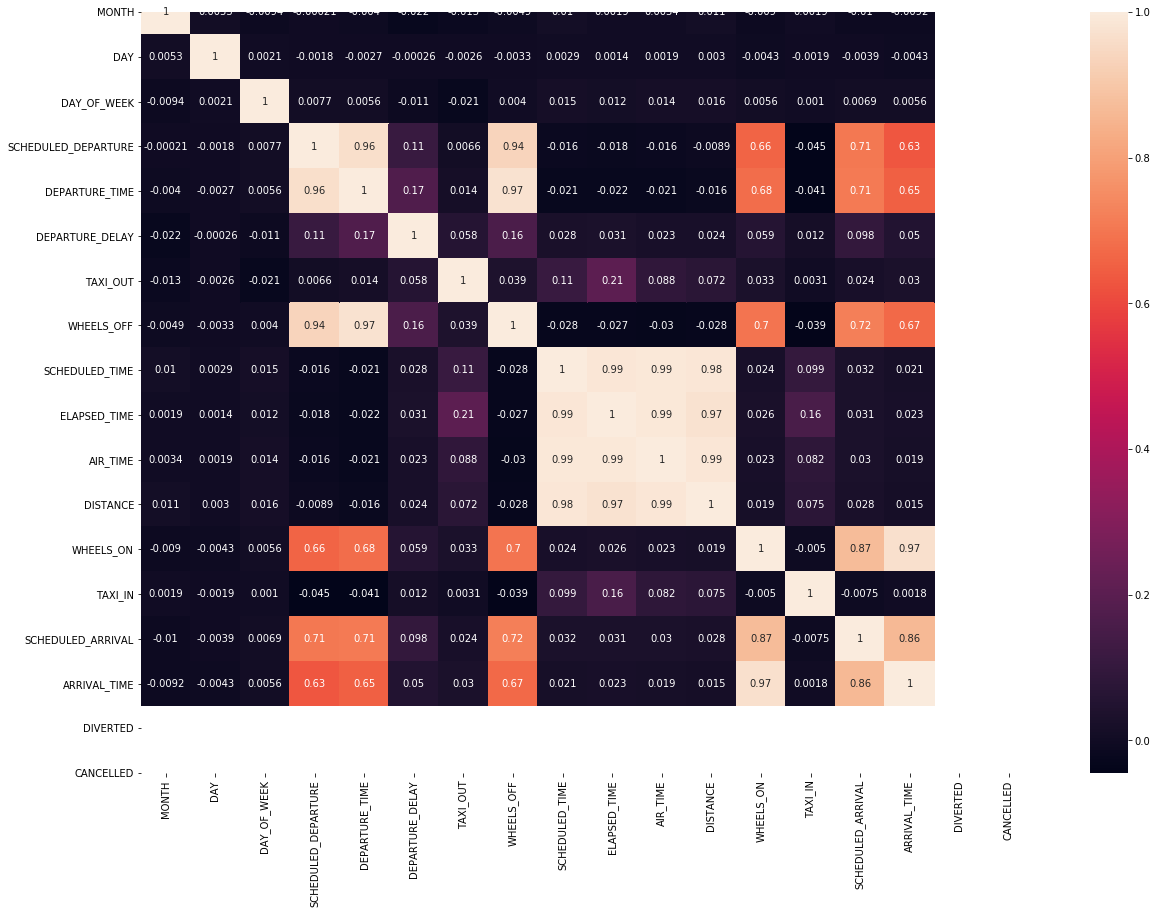

In [13]:
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [14]:
flight = flight.drop(
    ['WHEELS_OFF', 'SCHEDULED_DEPARTURE', 'WHEELS_ON', 'SCHEDULED_TIME', 
     'ELAPSED_TIME', 'AIR_TIME','ARRIVAL_TIME'], 
    axis=1)

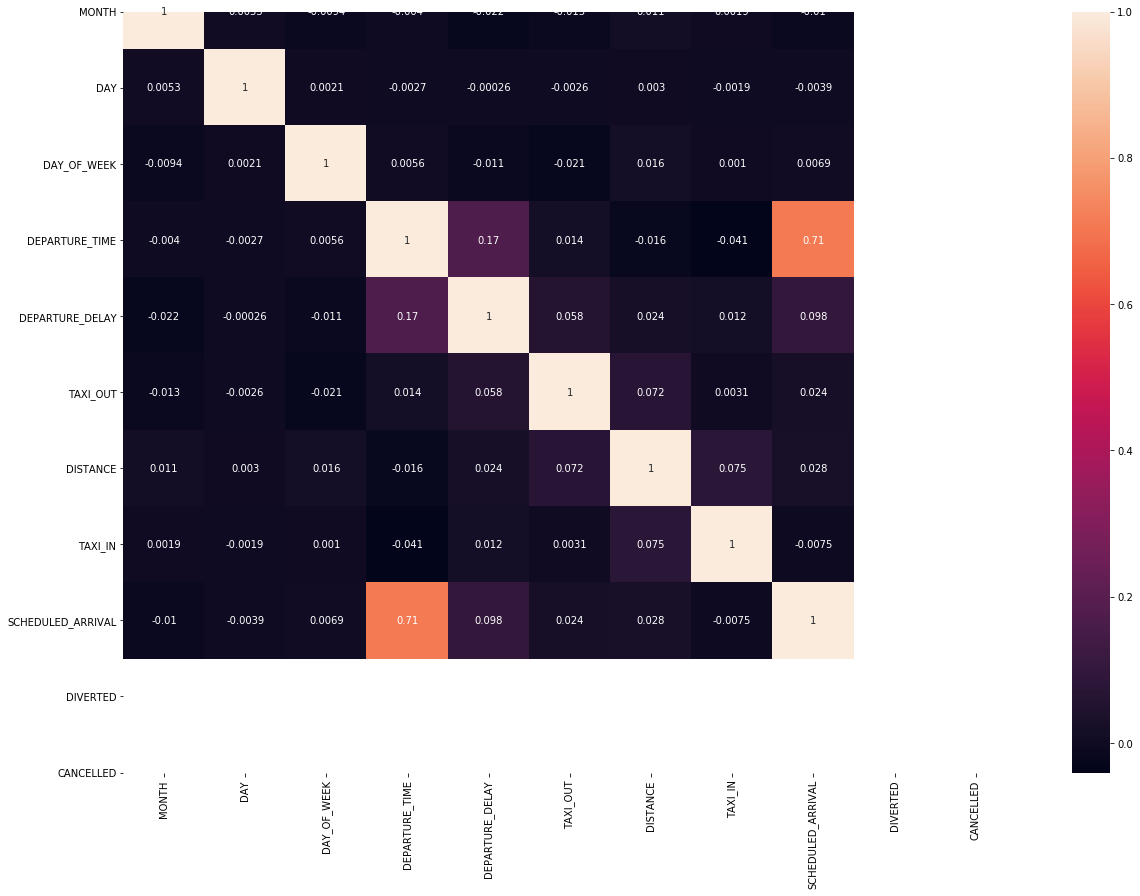

In [15]:
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [10]:
### Codificacion de variables categoricas
vbls_encode = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
encoder = LabelEncoder()

flight_encoder = flight.copy()

flight_category = flight[vbls_encode].apply(encoder.fit_transform)

flight_encoder = flight_encoder.drop(vbls_encode, axis=1).join(flight_category)
flight_encoder.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,1,4,5,2354.0,-11.0,21.0,15.0,205.0,194.0,...,1448,404.0,4.0,430,408.0,0,0,1,323,584
1,1,1,4,10,2.0,-8.0,12.0,14.0,280.0,279.0,...,2330,737.0,4.0,750,741.0,0,0,0,482,542
2,1,1,4,20,18.0,-2.0,16.0,34.0,286.0,293.0,...,2296,800.0,11.0,806,811.0,0,0,11,584,373
3,1,1,4,20,15.0,-5.0,15.0,30.0,285.0,281.0,...,2342,748.0,8.0,805,756.0,0,0,0,482,510
4,1,1,4,25,24.0,-1.0,11.0,35.0,235.0,215.0,...,1448,254.0,5.0,320,259.0,0,0,1,583,324


In [11]:
#Separación de variables que no se estandarizan
flight_encoder_nostd = flight[['MONTH','DAY','DAY_OF_WEEK','DIVERTED','AIRLINE','CANCELLED','ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
flight_encoder_nostd                        

,MONTH,DAY,DAY_OF_WEEK,DIVERTED,AIRLINE,CANCELLED,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,1,4,0,AS,0,ANC,SEA
1,1,1,4,0,AA,0,LAX,PBI
2,1,1,4,0,US,0,SFO,CLT
3,1,1,4,0,AA,0,LAX,MIA
4,1,1,4,0,AS,0,SEA,ANC
...,...,...,...,...,...,...,...,...
5819074,12,31,4,0,B6,0,LAX,BOS
5819075,12,31,4,0,B6,0,JFK,PSE
5819076,12,31,4,0,B6,0,JFK,SJU
5819077,12,31,4,0,B6,0,MCO,SJU


In [12]:
##Separación de las variables a estandarizar
flight_encoder_std= flight[['DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','DISTANCE','TAXI_IN','SCHEDULED_ARRIVAL']]
flight_encoder_std

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL
0,2354.0,-11.0,21.0,1448,4.0,430
1,2.0,-8.0,12.0,2330,4.0,750
2,18.0,-2.0,16.0,2296,11.0,806
3,15.0,-5.0,15.0,2342,8.0,805
4,24.0,-1.0,11.0,1448,5.0,320
...,...,...,...,...,...,...
5819074,2355.0,-4.0,22.0,2611,4.0,819
5819075,2355.0,-4.0,17.0,1617,3.0,446
5819076,2350.0,-9.0,17.0,1598,8.0,440
5819077,2353.0,-6.0,10.0,1189,3.0,340


In [13]:
# Creamos el Scaler y estandarizamos los Datos númericos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(flight_encoder_std)
flight_std = scaler.transform(flight_encoder_std)
print(flight_std )

[[ 2.05256605 -0.55014897  0.55553405  1.02444897 -0.61026756 -2.09742465]
 [-2.68535965 -0.46882551 -0.45770013  2.47352924 -0.61026756 -1.46613777]
 [-2.65312886 -0.30617857 -0.00737383  2.417669    0.6355166  -1.35566257]
 ...
 [ 2.04450835 -0.49593333  0.10520775  1.2708912   0.1016091  -2.07769694]
 [ 2.05055162 -0.41460986 -0.68286328  0.5989254  -0.78823673 -2.27497409]
 [-2.66118656  0.15465441 -0.23253698  1.23474634 -0.4322984  -2.07769694]]


In [14]:
##LLevamos los datos estandarizados a un data frame
flight_std= pd.DataFrame(flight_std, columns=['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE','TAXI_IN','SCHEDULED_ARRIVAL'])
flight_std

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL
0,2.052566,-0.550149,0.555534,1.024449,-0.610268,-2.097425
1,-2.685360,-0.468826,-0.457700,2.473529,-0.610268,-1.466138
2,-2.653129,-0.306179,-0.007374,2.417669,0.635517,-1.355663
3,-2.659172,-0.387502,-0.119955,2.493245,0.101609,-1.357635
4,-2.641042,-0.279071,-0.570282,1.024449,-0.432298,-2.314430
...,...,...,...,...,...,...
5714003,2.054580,-0.360394,0.668116,2.935198,-0.610268,-1.330017
5714004,2.054580,-0.360394,0.105208,1.302107,-0.788237,-2.065860
5714005,2.044508,-0.495933,0.105208,1.270891,0.101609,-2.077697
5714006,2.050552,-0.414610,-0.682863,0.598925,-0.788237,-2.274974


In [15]:
##Aplicamos componentes princiáles a los datos numéricos estandarizados
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca_result = pca.fit_transform(flight_std)
pca_result

array([[-0.06812199,  0.4437563 , -0.57821027, -0.95511672,  0.47752995],
       [-2.91597903,  1.2588608 ,  0.01741002, -1.09137734,  2.09821886],
       [-2.80169225,  2.0833229 ,  0.53416974, -0.65231948,  1.29554655],
       ...,
       [-0.0935009 ,  0.72836581,  0.21011096, -0.70351586,  0.56287144],
       [-0.2256378 , -0.50901643, -0.04470912, -0.44338099,  1.03586306],
       [-3.17763621,  0.84299017, -0.46084557,  0.05418554,  1.40911282]])

In [16]:
##varianza explicada por cada una de las características
print(pca.explained_variance_ratio_)

[0.29363492 0.18690505 0.16705404 0.15690425 0.14823772]


In [17]:
# Build the pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(flight_std)

print(pc)

[[-0.06812199  0.4437563 ]
 [-2.91597903  1.2588608 ]
 [-2.80169225  2.0833229 ]
 ...
 [-0.0935009   0.72836581]
 [-0.2256378  -0.50901643]
 [-3.17763621  0.84299017]]


In [18]:
# Add the 2 components to poke_cat_dfpc=
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2'])
flight_encoder_nostd['PC 1'] = pc_df ['PC 1']
flight_encoder_nostd['PC 2'] = pc_df ['PC 2']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


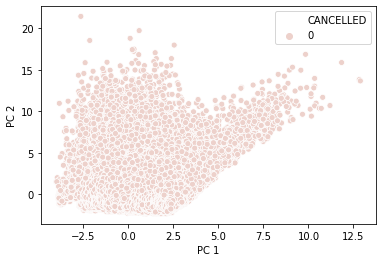

In [25]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='CANCELLED')
plt.show()

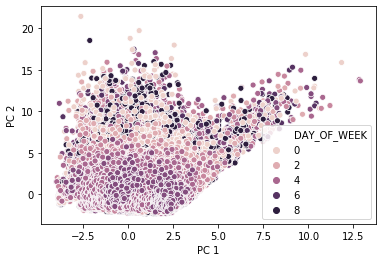

In [26]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='DAY_OF_WEEK')
plt.show()

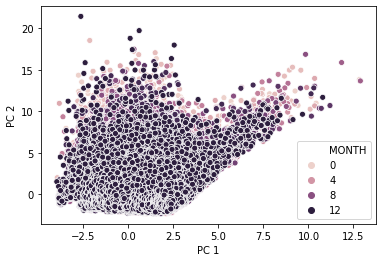

In [27]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='MONTH')
plt.show()

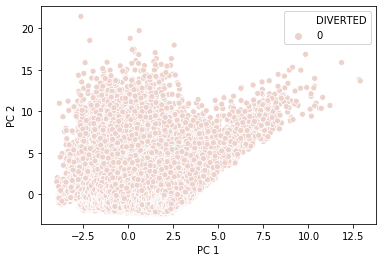

In [28]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='DIVERTED')
plt.show()

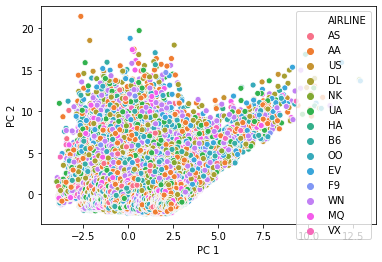

In [29]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='AIRLINE')
plt.show()

In [19]:
##Se eliminan las variables sin variación
flight_encoder_nostd  = flight_encoder_nostd .drop(
    ['DIVERTED', 'CANCELLED', 'PC 1', 'PC 2'], 
    axis=1)


In [30]:
flight_complete=pd.concat([flight_encoder_nostd.reset_index(drop=True), flight_std.reset_index(drop=True)], axis=1)
flight_complete.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL
0,1,1,4,AS,ANC,SEA,2.052566,-0.550149,0.555534,1.024449,-0.610268,-2.097425
1,1,1,4,AA,LAX,PBI,-2.685360,-0.468826,-0.457700,2.473529,-0.610268,-1.466138
2,1,1,4,US,SFO,CLT,-2.653129,-0.306179,-0.007374,2.417669,0.635517,-1.355663
3,1,1,4,AA,LAX,MIA,-2.659172,-0.387502,-0.119955,2.493245,0.101609,-1.357635
4,1,1,4,AS,SEA,ANC,-2.641042,-0.279071,-0.570282,1.024449,-0.432298,-2.314430


In [31]:
flight_complete.shape

(5714008, 12)

In [36]:
# Particion de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_set, test_set, train_set_target, test_set_target = train_test_split(flight_encoder, arrival_delay, test_size=0.3, random_state=24)

In [33]:
test_set.shape

(1714203, 12)

In [34]:
test_set_target.shape

(1714203,)

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=1, n_jobs=-1)
forest_reg.fit(train_set,train_set_target)

ValueError: could not convert string to float: 'AA'

In [ ]:
accuracy = forest_reg.score(test_set, test_set_target)
# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_set_target,(forest_reg.predict(train_set)).round())

In [ ]:
confusion_matrix(test_set_target,(forest_reg.predict(test_set)).round())

In [ ]:
pred = forest_reg.predict(test_set)

# Plot predicted MPG without error bars
plt.scatter(test_set_target, pred)
plt.plot([-200, 2000], [-200, 2000], 'k--')
plt.xlabel('Reported')
plt.ylabel('Predicted')
plt.show()

In [ ]:
lista = []
for i in range(0, len(test_set_target)):
    lista.append(abs(test_set_target.iloc[i] - pred[i]))

In [ ]:
plt.plot(lista )

In [ ]:
plt.figure()
plt.plot(test_set_target, 'gd', label='Truth')
plt.plot(forest_reg.predict(test_set), 'b^', label='Prediction', markersize=2)
#plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
#plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

In [ ]:
predictions = list()
for t in range(len(test_set)):
    yhat = forest_reg.predict(test_set[t])
    obs = test_set[t]
    predictions.append(yhat)

error = mean_squared_error(test_set, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test_set)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
from matplotlib.pyplot import figure 
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lista)